## Introduction

Ce TP noté, est une mise en situation. 

Vous travaillez dans une entreprise de vente entre particuliers de vêtements d'occasion. Vos collègues du département marketing sont face à un problème : beaucoup d'utilisateurs rentrent incorrectement le type de le vêtement, qui n'apparait alors pas dans les bonnes recherches. En tant que data scientist de la startup, vous devez convaincre le CEO et les RH qu'avec un peu de financements pour votre équipe, vous pouvez automatiser le processus d'identification des vêtements. 

Vous avez décidé de faire la preuve de concept sur un jeu de donnée simplifié.

### Attendus

Votre échéance est le 25/11 à 23:59. \\
Vous rendrez un rapport de 3000 caractères maximum par groupe de deux ou trois (vous pouvez insérer autant de figures que vous voudrez) ainsi qu'un code fonctionnel. \\
Le rapport devra présenter de manière didactique les concepts sous-jacents à l'étude réalisée. Cette étude comparera plusieurs techniques d'apprentissage différentes et être robuste. Vous utiliserez au moins une méthode ne faisnat pas intervenir les réseaux de neurones. Vous devrez justifier vos choix. Attention, le meilleur modèle n'est pas forcément celui donnant le meilleur taux de réussite, mais celui avec lequel vous réussirez le mieux à convaincre votre équipe.
Vous reporterez le résultat du modèle que vous choisirez comme étant le meilleur selon la métrique d'évaluation de votre choix. Ne perdez pas votre temps en verbiage inutile et description du jeu de données. \\
Le code devra permettre d'utiliser le modèle choisi sur un jeu de données du même type. 


### Exemple d'images du jeu de données

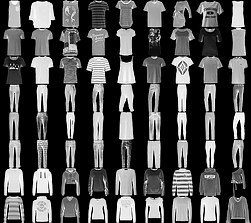

Le jeu de données est composé de 60000 images en niveau de gris de 28*28 pixels.  Les images appartiennent à 10 catégories distinctes.

In [1]:
class_names = ['Tshirt', 'Pantalon', 'Pull', 'Robe', 'Veste', 
               'Sandale', 'Chemise', 'Basket', 'Sac', 'Bottine']

## Pour démarrer

Voici une fonction permettant de charger le jeu de données. Vous trouverez aussi un tutoriel pour scikit-learn et keras, deux bibliothèques de python très communes. Cela ne doit pas vous limiter, bien au contraire : vous êtes libres d'utiliser d'autres librairies, ou même langages ( R, Matlab...) si cela vous semble intéressant. L'équipe qui développera le meilleur modèle gagnera un paquet de chocolats, à venir chercher dans mon bureau (le partage avec la promo est vivement encouragé.)

In [1]:
%matplotlib inline
# sauvegarder et charger des workspaces python
import pickle
import numpy as np

# sauvegarde:
#with open('dataset_TP3.pkl', 'wb') as f: 
  #  pickle.dump([train_images, train_labels],f)

# chargement:
with open('dataset_TP3.pkl','rb') as f: 
    train_images, train_labels = pickle.load(f)

In [2]:
train_resize = np.zeros(60000*28*28).reshape(60000, 28*28)

In [3]:
for i in range(0, 60000):
    train_resize[i] = train_images[i].reshape(-1)  # resize to 60000 * 784 so that the input matches the ML model

In [59]:
train_images_c = train_resize[0:6000, :]
train_labels_c = train_labels[0:6000]

In [60]:
train_images_c.shape

(6000, 784)

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_resize, train_labels, random_state=2, test_size = 0.20)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics


clf = SVC(C=1, kernel='linear') 
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred)) # 0.81 linear

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from time import time

time0 = time()

clf = RandomForestClassifier(criterion='entropy', n_estimators=100, max_depth=50, random_state=0)
clf.fit(x_train, y_train)
print(clf.score(x_test, y_test))

print("\nTraining Time (in minutes) =",(time()-time0)/60)
# n_estimators depth accuracy time
# 50 10 0.854 0.257
# 100 10 0.853 0.489
# 100 50 0.882 0.855
# 100 50 0.881 1.012 (entropy)

0.881

Training Time (in minutes) = 1.0121042807896932


In [ ]:
###################
# DEEP LEARNING
###################

In [22]:
import numpy as np
import pandas as pd 
import torch  # using PyTorch as framework
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
from torch.utils.data import DataLoader

In [30]:
transform = transforms.Compose([transforms.ToTensor()])

trainset = datasets.FashionMNIST(root='./data', train=True, transform=transform, target_transform=None, download=False)
trainloader = DataLoader(dataset=trainset, batch_size=32, shuffle=True, num_workers=8)
testset = datasets.FashionMNIST(root='./data', train=False, transform=transform, target_transform=None, download=False)
testloader = DataLoader(dataset=trainset, batch_size=32, shuffle=True, num_workers=8)

In [31]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [32]:
# LeNet

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3) 
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(400, 120)  
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x)) # transform into a vector for linear (fc layer)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [33]:
from time import time

criterion = nn.CrossEntropyLoss()
net_cuda = net.cuda()  # transform the model to CUDA

optimizer = optim.Adam(net_cuda.parameters(), lr=0.003, eps=1e-08)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        images_cuda = images.cuda()  # transform the data to CUDA
        labels_cuda = labels.cuda()
        
        # Set the gradient to zero
        optimizer.zero_grad()
        
        output = net_cuda(images_cuda)
        loss = criterion(output, labels_cuda)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))

print("\nTraining Time (in minutes) =",(time()-time0)/60)  # 8.08 min for SGD, 9.19 for Adam
# 4.00 


Epoch 0 - Training loss: 0.5335875926733017
Epoch 1 - Training loss: 0.3566896702806155
Epoch 2 - Training loss: 0.3087014565984408
Epoch 3 - Training loss: 0.28198361468513805
Epoch 4 - Training loss: 0.2639920770784219
Epoch 5 - Training loss: 0.24994205394188562
Epoch 6 - Training loss: 0.23624835900068283
Epoch 7 - Training loss: 0.2268420767267545
Epoch 8 - Training loss: 0.2219211932847897
Epoch 9 - Training loss: 0.21256808472474417
Epoch 10 - Training loss: 0.20363360218008358
Epoch 11 - Training loss: 0.19775008779466152
Epoch 12 - Training loss: 0.19224733049670856
Epoch 13 - Training loss: 0.18770170628925165
Epoch 14 - Training loss: 0.1796675681759914

Training Time (in minutes) = 3.5528727372487388


In [34]:
# Output the accuracy 

correct = 0
total = 0
with torch.no_grad(): 
    for data in testloader:
        images, labels = data
        outputs = net_cuda.cpu()(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))  # 0.91 for SGD, 0.93 for Adam

Accuracy of the network on the test images: 93 %


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim  
import matplotlib.pyplot as plt
import numpy as np

In [2]:
torch.cuda.is_available()

True

In [11]:
torch.cuda.get_device_name(0)

'GeForce GTX 1050 Ti'

In [2]:
# Apparel classification with style

path = "datacloth/fashion-data.tar/fashion-data/images/" 
dataset_large = torchvision.datasets.ImageFolder(path,
                                            transform=transforms.Compose([
                                            transforms.Resize((64, 64)),
                                            transforms.ToTensor()]))

In [3]:
train_size = int(0.8 * len(dataset_large))
test_size = len(dataset_large) - train_size
trainset_large, testset_large = torch.utils.data.random_split(dataset_large, [train_size, test_size])

In [4]:
from torch.utils.data import Dataset, DataLoader

trainloader_large = DataLoader(dataset=trainset_large, batch_size=128, shuffle=True, num_workers=8)
testloader_large = DataLoader(dataset=testset_large, batch_size=64, shuffle=True, num_workers=8)

In [5]:
dataiter = iter(trainloader_large)
images, labels = dataiter.next()

In [6]:
# LeNet

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(3, 6, 3) 
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(3136, 120)  
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 15)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x)) # transform into a vector for linear (fc layer)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=3136, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=15, bias=True)
)


In [20]:
from time import time

criterion = nn.CrossEntropyLoss()
net_cuda = net.cuda()

optimizer = optim.Adam(net_cuda.parameters(), lr=0.003, eps=1e-08)
time0 = time()
epochs = 50
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader_large:
        
        images_cuda = images.cuda()
        labels_cuda = labels.cuda()
        
        # Set the gradient to zero
        optimizer.zero_grad()
        
        output = net_cuda(images_cuda)
        loss = criterion(output, labels_cuda)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader_large)))

print("\nTraining Time (in minutes) =",(time()-time0)/60)

# setting time
# cpu 42
# gpu(batch=32) 19
# gpu(num_workers=4, batch=32) 5.7
# gpu(n_workers=8, batch=128, epoch=50) 21.64

Epoch 0 - Training loss: 2.2539859892224237
Epoch 1 - Training loss: 2.0966487938551595
Epoch 2 - Training loss: 2.0023196909925063
Epoch 3 - Training loss: 1.929019564990517
Epoch 4 - Training loss: 1.860127593330342
Epoch 5 - Training loss: 1.7995668124380728
Epoch 6 - Training loss: 1.7421234039951572
Epoch 7 - Training loss: 1.6876385572145312
Epoch 8 - Training loss: 1.6365139111340474
Epoch 9 - Training loss: 1.5831719729111349
Epoch 10 - Training loss: 1.5355976397613826
Epoch 11 - Training loss: 1.4826621518289442
Epoch 12 - Training loss: 1.4409070231502863
Epoch 13 - Training loss: 1.4015822573531447
Epoch 14 - Training loss: 1.3618357160108552
Epoch 15 - Training loss: 1.3306103074293343
Epoch 16 - Training loss: 1.2830033917650043
Epoch 17 - Training loss: 1.2544122355447398
Epoch 18 - Training loss: 1.2226228472783411
Epoch 19 - Training loss: 1.1959631701381943
Epoch 20 - Training loss: 1.1634050188519114
Epoch 21 - Training loss: 1.13703565631839
Epoch 22 - Training loss

In [21]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader_large:
        images, labels = data
        outputs = net_cuda.cpu()(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))
# epoch lr accuracy
# 10 0.003 0.29

Accuracy of the network on the test images: 28 %


In [7]:
# load pre-trained models

import torchvision.models as models

model_conv = models.resnet18(pretrained=True)
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 15)

In [6]:
torch.cuda.empty_cache()

In [8]:
from time import time

criterion = nn.CrossEntropyLoss()
model_cuda = model_conv.cuda()

optimizer = optim.Adam(model_cuda.parameters(), lr=0.003, eps=1e-08)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader_large:
        
        images_cuda = images.cuda()
        labels_cuda = labels.cuda()
        
        # Set the gradient to zero
        optimizer.zero_grad()
        
        output = model_cuda(images_cuda)
        loss = criterion(output, labels_cuda)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader_large)))

print("\nTraining Time (in minutes) =",(time()-time0)/60)

# setting train test time
# resnet18+0.003+30 97 44.46 44
#               +15 96 45 22.15
#               +10 87 44 14.74

Epoch 0 - Training loss: 2.2383765835556195
Epoch 1 - Training loss: 2.0020457285342457
Epoch 2 - Training loss: 1.847818523645401
Epoch 3 - Training loss: 1.8577472340288779
Epoch 4 - Training loss: 1.7660658931989464
Epoch 5 - Training loss: 1.586983755123701
Epoch 6 - Training loss: 1.4437520184534058
Epoch 7 - Training loss: 1.4231064505071092
Epoch 8 - Training loss: 1.1433614157944274
Epoch 9 - Training loss: 0.8494471229023213
Epoch 10 - Training loss: 0.6261243521631192
Epoch 11 - Training loss: 0.45736563087796134
Epoch 12 - Training loss: 0.3199187205742589
Epoch 13 - Training loss: 0.2671851402135204
Epoch 14 - Training loss: 0.2269539684861255

Training Time (in minutes) = 22.04007186492284


In [11]:
correct = 0
total = 0
with torch.no_grad():
    for data in trainloader_large:
        images, labels = data
        outputs = model_cuda.cpu()(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

Accuracy of the network on the test images: 87 %


In [14]:
torch.save(model_conv.state_dict(), 'datacloth/model_conv.pth')

In [11]:
# Top 5 Accuracy

def evalTop5(model, loader):
    model.eval()
    correct = 0
    total = len(loader.dataset)
    for x, y in loader:
        with torch.no_grad():
            logits = model(x)
            maxk = max((1, 5))
            y_resize = y.view(-1, 1)
            _, pred = logits.topk(maxk, 1, True, True)
            correct += torch.eq(pred, y_resize).sum().float().item()
    return correct/total

In [12]:
evalTop5(model_cuda.cpu(), testloader_large)

0.8158057444775448

In [ ]:
# top5 0.84 0.82
# top3 0.72 0.69